In [3]:
import yt
from yt.analysis_modules.star_analysis.api import StarFormationRate

import numpy as np 
#import bottleneck as bn

from astropy.table import Table
import astropy.units as u

from consistency import *
from get_halo_center import get_halo_center
from get_proper_box_size import get_proper_box_size
from modular_plots import get_refine_box

import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rcParams['font.size'] = 18.
import matplotlib.pyplot as plt


%matplotlib inline

In [4]:
cool_color = '#4575b4' ###  blue
nat_color = '#4daf4a' # green



In [9]:
dsn = yt.load('/Users/molly/foggie/halo_002392/nref11n/RD0020/RD0020')

track_name = "halo_tracks/002392/nref11n_selfshield_15/track_1/halo_track_200kpc_nref9"
track = Table.read(track_name, format='ascii')
track.sort('col1')
proper_box_size = get_proper_box_size(dsn)
width = 150. #kpc

zsnap = dsn.current_redshift
refine_box_natural, refine_box_center_natural, refine_width = get_refine_box(dsn, zsnap, track)
refine_width = refine_width * proper_box_size
centern, velocity = get_halo_center(dsn, refine_box_center_natural)
width_code = width / proper_box_size ## needs to be in code units
boxn = dsn.r[centern[0] - 0.5*width_code : centern[0] + 0.5*width_code, \
           centern[1] - 0.5*width_code : centern[1] + 0.5*width_code, \
           centern[2] - 0.5*width_code : centern[2] + 0.5*width_code]

dsc = yt.load('/Users/molly/foggie/halo_002392/nref11c_nref9f/RD0020/RD0020')
zsnap = dsc.current_redshift
refine_box_cool, refine_box_center, refine_width = get_refine_box(dsc, zsnap, track)
refine_width = refine_width * proper_box_size
centerc, velocity = get_halo_center(dsc, refine_box_center)
width_code = width / proper_box_size ## needs to be in code units
boxc = dsc.r[centerc[0] - 0.5*width_code : centerc[0] + 0.5*width_code, \
           centerc[1] - 0.5*width_code : centerc[1] + 0.5*width_code, \
           centerc[2] - 0.5*width_code : centerc[2] + 0.5*width_code]


yt : [INFO     ] 2019-03-29 10:49:11,375 Parameters: current_time              = 154.80103271343
yt : [INFO     ] 2019-03-29 10:49:11,382 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2019-03-29 10:49:11,387 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-03-29 10:49:11,391 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-03-29 10:49:11,392 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2019-03-29 10:49:11,394 Parameters: current_redshift          = 1.9999996880027
yt : [INFO     ] 2019-03-29 10:49:11,395 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2019-03-29 10:49:11,396 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2019-03-29 10:49:11,397 Parameters: hubble_constant           = 0.695
Parsing Hierarchy :  25%|██▌       | 793/3164 [00:00<00:00, 7925.64it/s]

inside get_refine_box 1.9999996880027
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99979384142 0.496842 0.496161 0.478444 0.498842 0.498161 0.480444    9
get_halo_centers:  code_length code_velocity


Parsing Hierarchy : 100%|██████████| 3164/3164 [00:00<00:00, 12525.73it/s]
yt : [INFO     ] 2019-03-29 10:49:11,925 Gathering a field list (this may take a moment.)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/units/yt_array.py:978: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  ret = super(YTArray, self).__getitem__(item)
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/yt/fields/fluid_fields.py:201: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_field[slice_3d] = f
yt : [INFO     ] 2019-03-29

Located the main halo at: [0.49784183502197266, 0.4971609115600586, 0.4794435501098633] [-0.00020521016991016962 code_velocity, -0.0016347024694992826 code_velocity, -0.0019452433786325018 code_velocity]
inside get_refine_box 2
using this loc:      col1       col2     col3     col4     col5     col6     col7   col8
------------- -------- -------- -------- -------- -------- -------- ----
1.99979384142 0.496842 0.496161 0.478444 0.498842 0.498161 0.480444    9
get_halo_centers:  code_length code_velocity


Parsing Hierarchy : 100%|██████████| 15873/15873 [00:01<00:00, 9179.42it/s] 
yt : [INFO     ] 2019-03-29 10:49:16,504 Gathering a field list (this may take a moment.)


Located the main halo at: [0.4978303909301758, 0.4971151351928711, 0.4794607162475586] [-0.0009154590729795639 code_velocity, -0.0038822352792122344 code_velocity, -0.004486302816256311 code_velocity]


In [10]:
radius = 20.

## The star formations are a built in function in enzo
spn = dsn.sphere(centern,(radius,'kpc'))
spc = dsc.sphere(centerc,(radius,'kpc'))

sfrn = StarFormationRate(dsn, data_source=spn)
sfrc = StarFormationRate(dsc, data_source=spc)


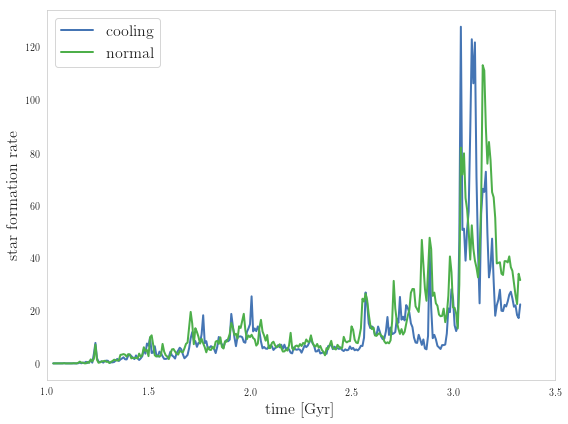

In [15]:
fig = plt.figure(figsize=(8,6))

plt.plot(sfrc.time.to('Gyr'),sfrc.Msol_yr, lw=2, color=cool_color, label="cooling")
plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_yr, lw=2, color=nat_color, label="normal")

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('time [Gyr]', fontsize=16)
plt.ylabel('star formation rate', fontsize=16)
# plt.xlim(1,13.7)
plt.xlim(1,3.5)
plt.tight_layout()

plt.savefig('/Users/molly/Dropbox/foggie-collab/plots_halo_002392/comparisons/sfh_t.png')


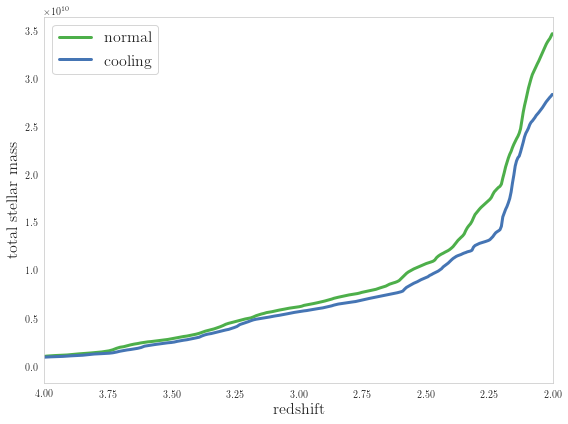

In [13]:
fig = plt.figure(figsize=(8,6))

plt.plot(sfrn.redshift,sfrn.Msol_cumulative, lw=3, color=nat_color, label="normal")
plt.plot(sfrc.redshift,sfrc.Msol_cumulative, lw=3, color=cool_color, label="cooling")

plt.legend(fontsize=16)
plt.xlabel('redshift',fontsize=16)
plt.ylabel('total stellar mass',fontsize=16)
plt.xlim(4,2)
plt.tight_layout()

plt.savefig('/Users/molly/Dropbox/foggie-collab/plots_halo_002392/comparisons/sfh_cumul_z.png')


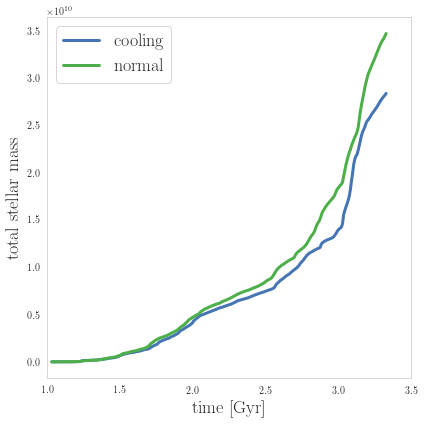

In [14]:
fig = plt.figure(figsize=(6,6))

plt.plot(sfrc.time.to('Gyr'),sfrc.Msol_cumulative, lw=3, color=cool_color, label="cooling")
plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_cumulative, lw=3, color=nat_color, label="normal")

plt.legend(fontsize=18)
plt.xlabel('time [Gyr]',fontsize=18)
plt.ylabel('total stellar mass',fontsize=18)
plt.xlim(1,3.5)
plt.tight_layout()

plt.savefig('/Users/molly/Dropbox/foggie-collab/plots_halo_002392/comparisons/sfh_cumul_t.png')


In [49]:
smn = spn['particle_mass']
metaln = spn['metallicity_fraction'].to('Zsun')
ctn = spn['creation_time']

smr = spr['particle_mass']
metalr = spr['metallicity_fraction'].to('Zsun')
ctr = spr['creation_time']

smc = spc['particle_mass']
metalc = spc['metallicity_fraction'].to('Zsun')
ctc = spc['creation_time']

starsn = (ctn > 0)
ctn = ctn[starsn]
smn = smn[starsn]
metaln = metaln[starsn]

starsr = (ctr > 0)
ctr = ctr[starsr]
smr = smr[starsr]
metalr = metalr[starsr]

starsc = (ctc > 0)
ctc = ctc[starsc]
smc = smc[starsc]
metalc = metalc[starsc]


In [50]:

# make a table
nt = Table([ctn.to('Gyr'), metaln, smn.to('Msun')], names=('ct', 'metal', 'starmass'))
rt = Table([ctr.to('Gyr'), metalr, smr.to('Msun')], names=('ct', 'metal', 'starmass'))
cot = Table([ctc.to('Gyr'), metalc, smc.to('Msun')], names=('ct', 'metal', 'starmass'))

nt.sort('ct')
rt.sort('ct')
cot.sort('ct')

<IPython.core.display.Javascript object>


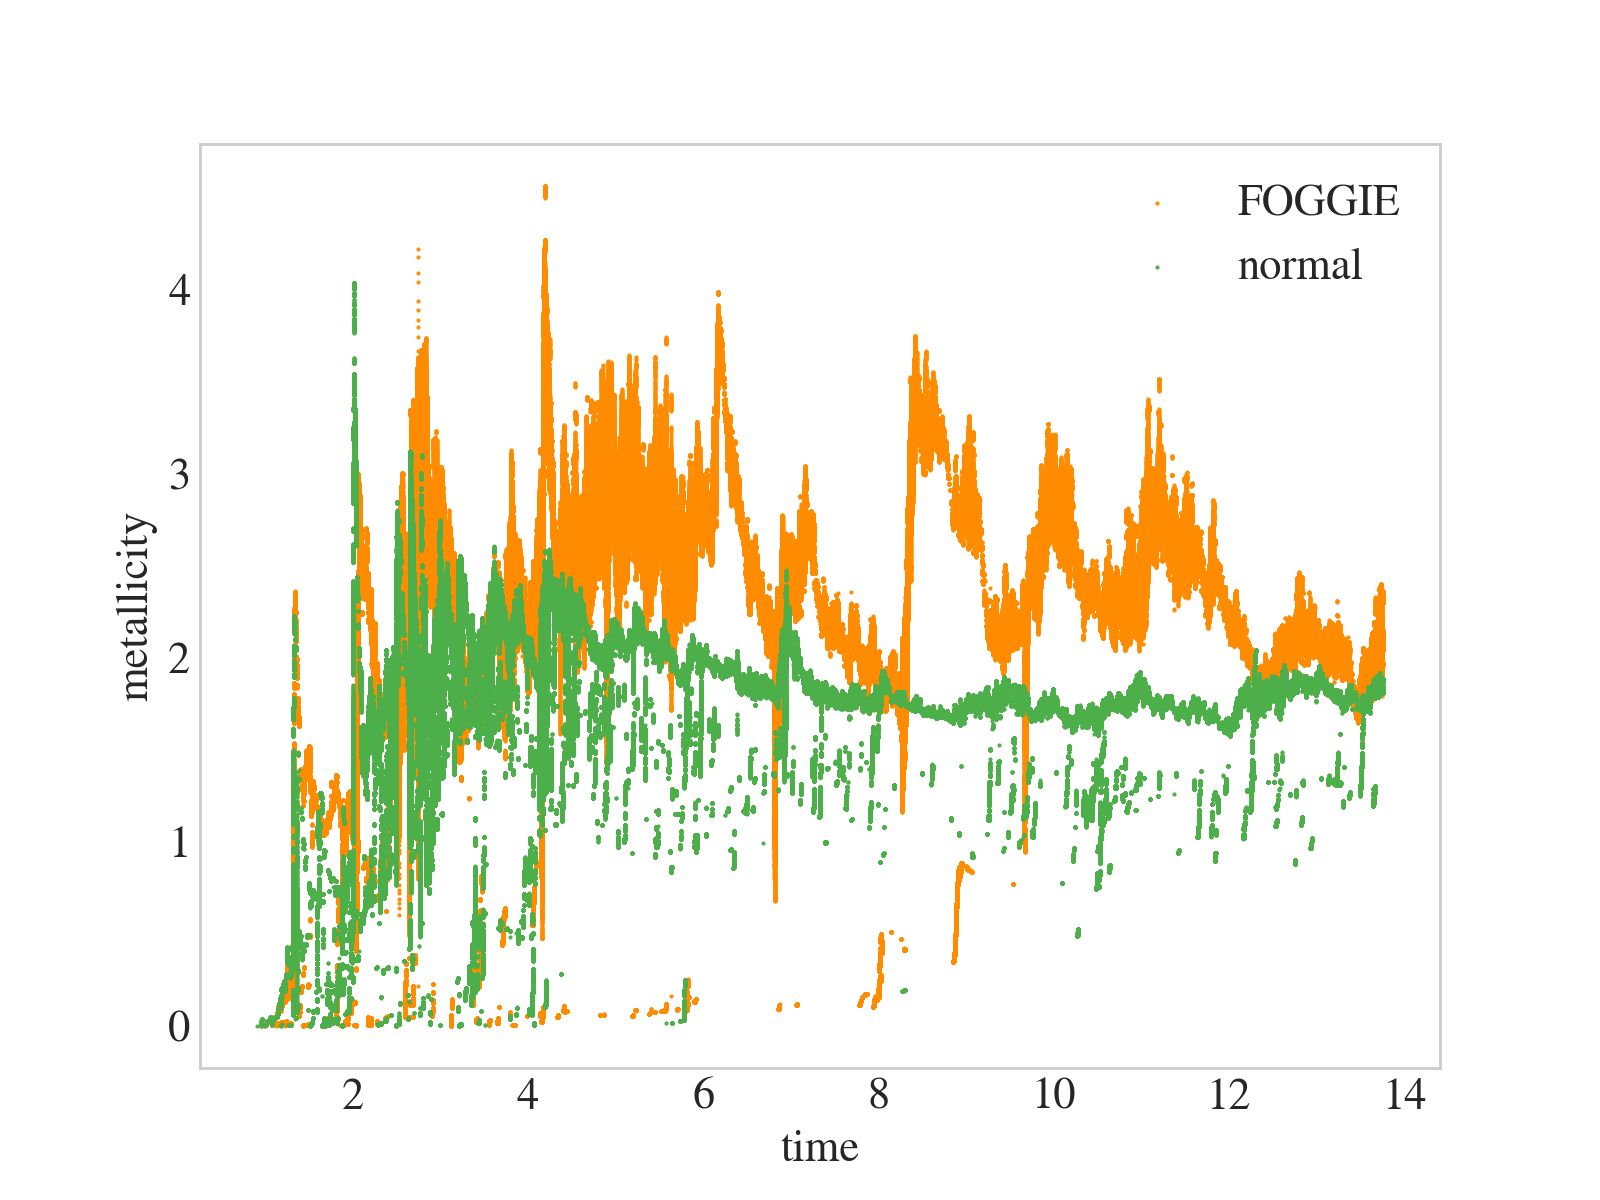

Text(0,0.5,u'metallicity')

In [45]:
fig = plt.figure(figsize=(8,6))

plt.scatter(ctr.to('Gyr'), metalr, marker='.', s=1, color=ref_color, label="FOGGIE")
plt.scatter(ctn.to('Gyr'), metaln, marker='.', s=1, color=nat_color, label="normal")

plt.legend()
plt.xlabel('time')
plt.ylabel('metallicity')
# plt.xlim(0,3.5)

#plt.plot(ct,metal,'o')

In [18]:
def movingaverage(values, window):
    mvavg = np.convolve(values, np.ones(window)/window,'same')                    
    return mvavg


metr = movingaverage(rt['metal'], 30000)
metn = movingaverage(nt['metal'], 30000)
metc = movingaverage(cot['metal'], 30000)

#### THIS WILL NOT BE RIGHT BECAUSE WE ARE NOT WEIGHTING BY ANYTHING !!!!!!!!

<IPython.core.display.Javascript object>


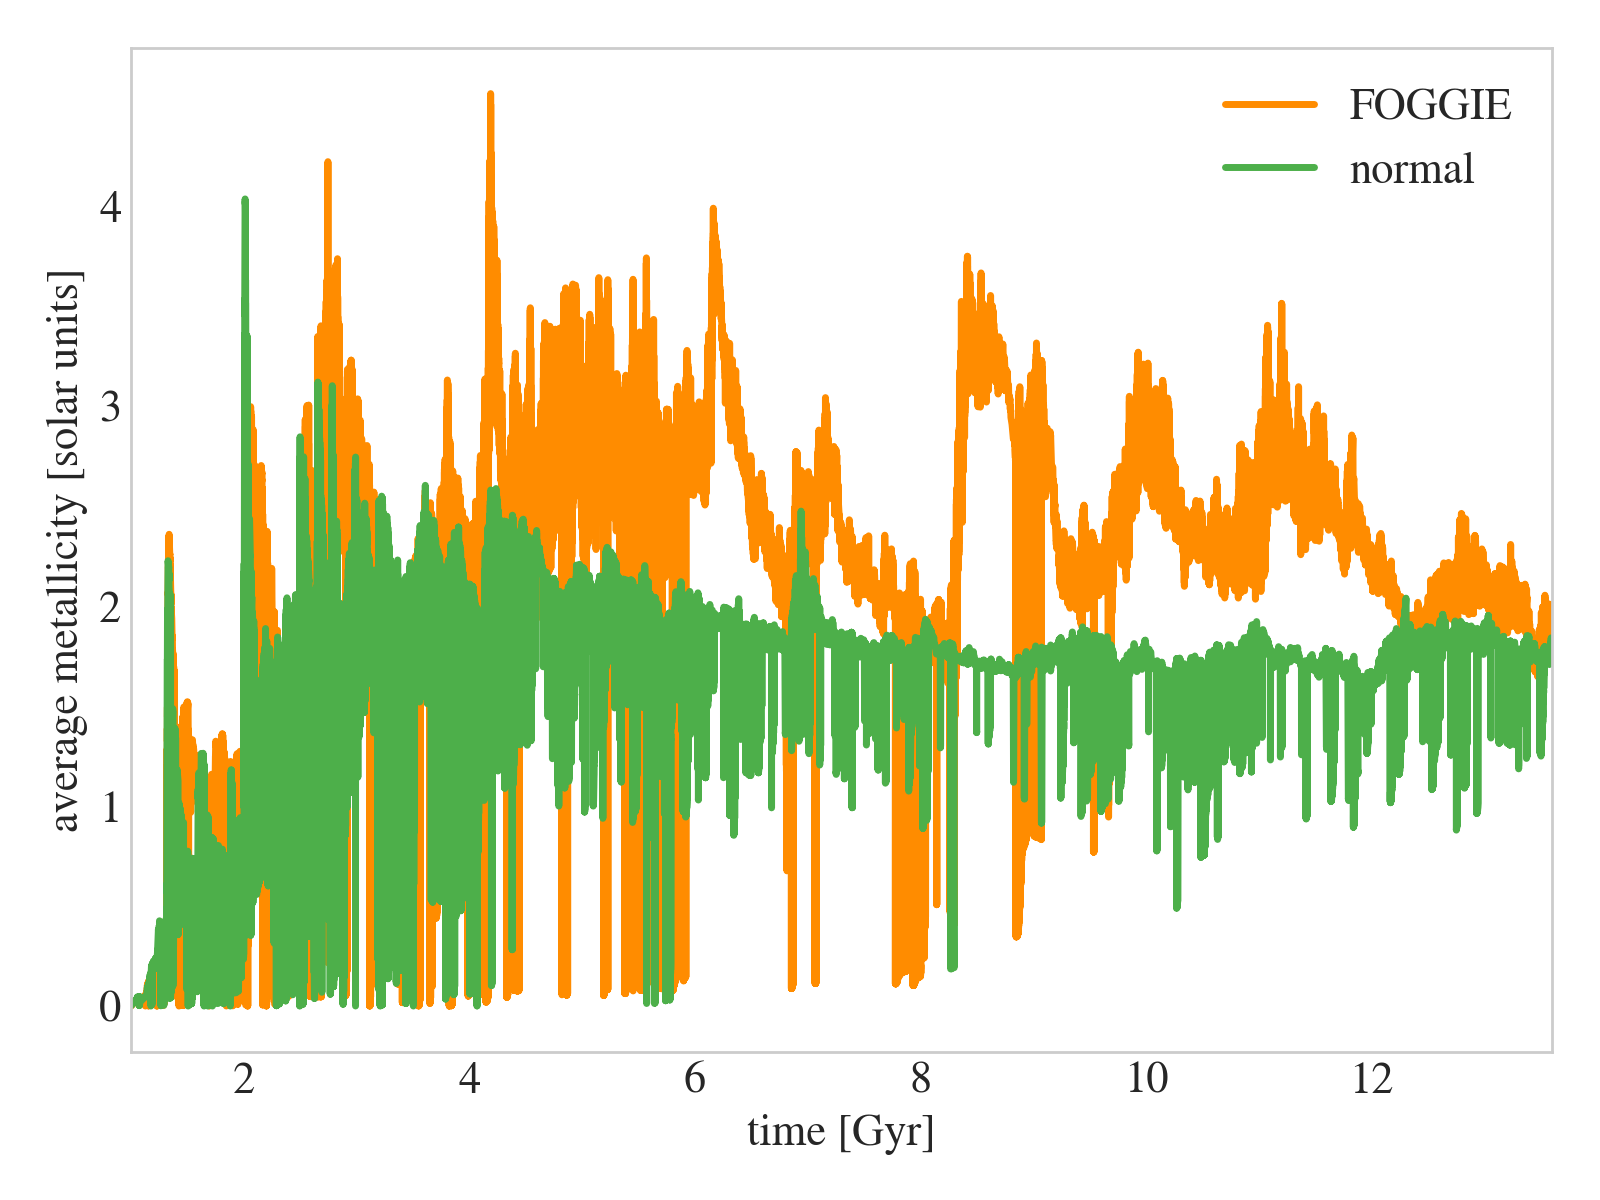

In [42]:
fig = plt.figure(figsize=(8,6))


#plt.scatter(ctr.to('Gyr'), metr, color=ref_color, label="FOGGIE")
plt.plot(rt['ct'], metr, lw=2.5, color=ref_color, label="FOGGIE")
plt.plot(nt['ct'], metn, lw=2.5, color=nat_color, label="normal")


plt.legend()
plt.xlim(1,13.6)
plt.xlabel('time [Gyr]')
plt.ylabel('average metallicity [solar units]')
plt.tight_layout()

##plt.savefig('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/metals_history.png')



In [53]:
massn = nt['starmass']
metn = nt['metal']
ctn = nt['ct']
metmassn = metn * massn

massr = rt['starmass']
metr = rt['metal']
ctr = rt['ct']
metmassr = metr * massr


massc = cot['starmass']
metc = cot['metal']
ctc = cot['ct']
metmassc = metc * massc

dt = 0.1
time = np.arange(0.7,8.0, dt)

avg_metn = np.zeros(len(time))
avg_metr = np.zeros(len(time))
avg_metc = np.zeros(len(time))
for i, t in enumerate(time):
    indn = np.where((ctn >= t) & (ctn < (t+dt)))
    avg_metn[i] = np.sum(metmassn[indn]) / np.sum(massn[indn])
    indr = np.where((ctr >= t) & (ctr < (t+dt)))
    avg_metr[i] = np.sum(metmassr[indr]) / np.sum(massr[indr])
    indc = np.where((ctc >= t) & (ctc < (t+dt)))
    avg_metc[i] = np.sum(metmassc[indc]) / np.sum(massc[indc])


/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/molly/anaconda3/envs/astroconda/lib/python3.5/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


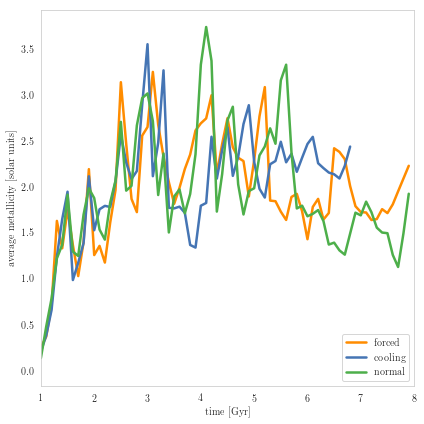

In [54]:
fig = plt.figure(figsize=(6,6))


#plt.scatter(ctr.to('Gyr'), metr, color=ref_color, label="FOGGIE")
#plt.plot(rt['ct'], metr, lw=2.5, color=ref_color, label="FOGGIE")
#plt.plot(nt['ct'], metn, lw=2.5, color=nat_color, label="normal")

plt.plot(time, avg_metr, lw=2.5, color=ref_color, label="forced")
plt.plot(time, avg_metc, lw=2.5, color=cool_color, label="cooling")
plt.plot(time, avg_metn, lw=2.5, color=nat_color, label="normal")

plt.legend(loc='lower right')
plt.xlim(1,8)
plt.xlabel('time [Gyr]')
plt.ylabel('average metallicity [solar units]')
plt.tight_layout()

plt.savefig('/Users/molly/Dropbox/foggie-collab/plots_halo_008508/nref11n/comparisons/metals_history.png')



<IPython.core.display.Javascript object>


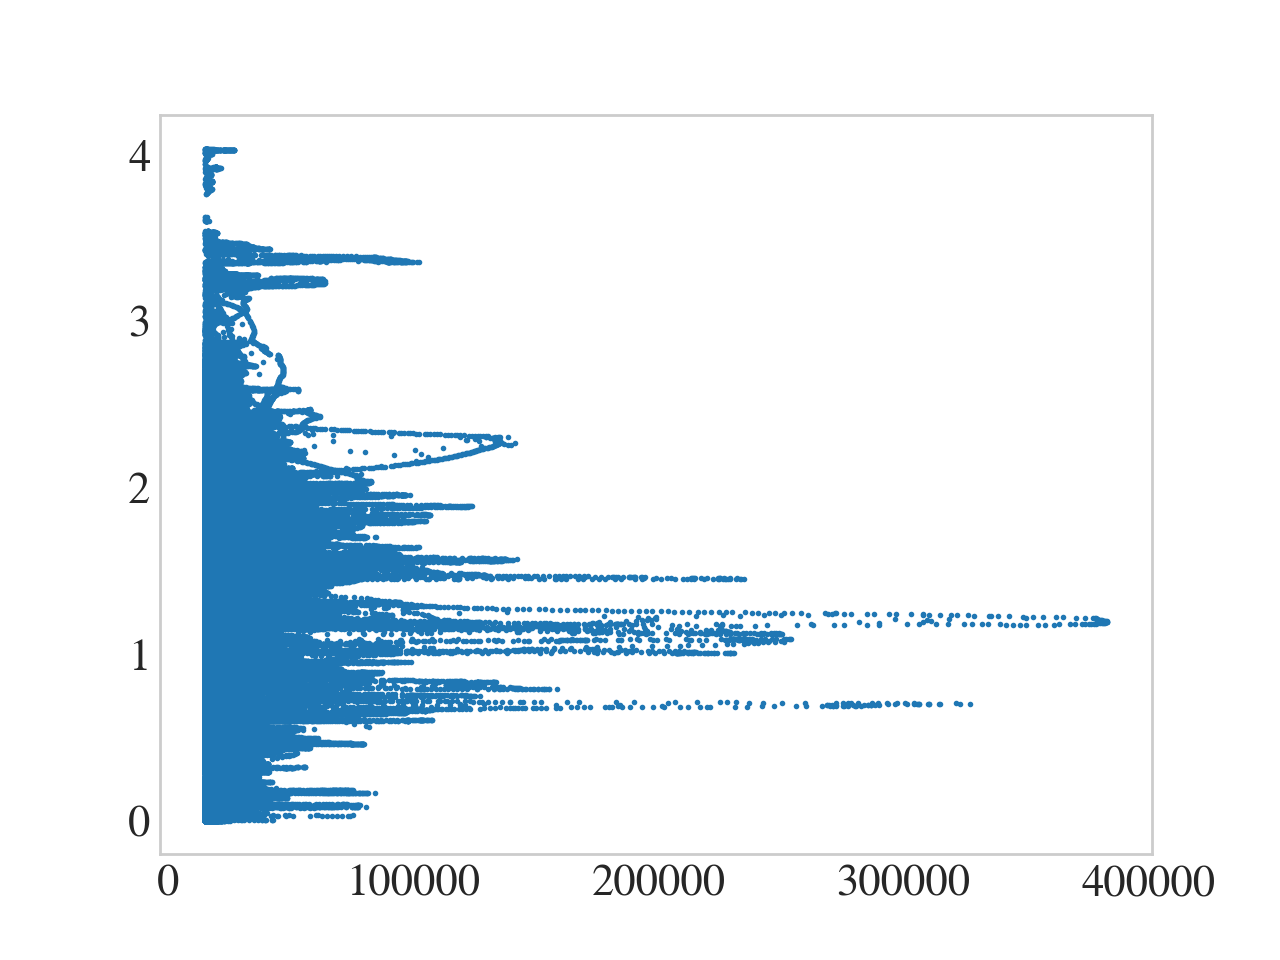

In [104]:
fig = plt.figure()
plt.scatter(nt['starmass'], nt['metal'], s=1)

In [68]:
dsnn = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/natural/RD0018/RD0018')
dsnr = yt.load('/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/RD0018/RD0018')


# zsnap = dsnr.current_redshift
zsnap = 2.49

track_name = "/Users/molly/foggie/halo_008508/nref11n_selfshield_z15/nref11n_nref10f_selfshield_z6/halo_track"
track = Table.read(track_name, format='ascii')
track.sort('col1')
proper_box_size = get_proper_box_size(dsnr)
width = 150. #kpc

refine_box, refine_box_centerr, refine_width = get_refine_box(dsnr, zsnap, track)
centernr, velocity = get_halo_center(dsnr, refine_box_centerr)

refine_box_natural, refine_box_centern, refine_width = get_refine_box(dsnn, zsnap, track)
centernn, velocity = get_halo_center(dsnn, refine_box_centern)


yt : [INFO     ] 2018-07-25 14:14:03,449 Parameters: current_time              = 123.513344305
yt : [INFO     ] 2018-07-25 14:14:03,450 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-25 14:14:03,452 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2018-07-25 14:14:03,454 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2018-07-25 14:14:03,456 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-25 14:14:03,457 Parameters: current_redshift          = 2.49999962114
yt : [INFO     ] 2018-07-25 14:14:03,459 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2018-07-25 14:14:03,460 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2018-07-25 14:14:03,461 Parameters: hubble_constant           = 0.695
yt : [INFO     ] 2018-07-25 14:14:03,495 Parameters: current_time              = 123.513344305
yt : [INFO     ] 2018-07-25 14:14:03,496 Parameters: domain_dimensions         = [256 256 25

('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463    10)


yt : [INFO     ] 2018-07-25 14:14:03,929 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49464893341064453, 0.4907369613647461, 0.5014715194702148]
('using this loc:', <Table length=1>
     col1       col2     col3     col4     col5     col6     col7    col8
   float64    float64  float64  float64  float64  float64  float64  int64
------------- -------- -------- -------- -------- -------- -------- -----
2.49999996364 0.493631 0.489759 0.500463 0.495631 0.491759 0.502463    10)


Parsing Hierarchy : 100%|██████████| 914/914 [00:00<00:00, 28394.05it/s]
yt : [INFO     ] 2018-07-25 14:14:51,979 Gathering a field list (this may take a moment.)


We have located the main halo at : [0.49464893341064453, 0.4907369613647461, 0.5014677047729492]


In [70]:
spnr = dsnr.sphere(centernr,(50.,'kpc'))
spnn = dsnn.sphere(centernn,(50.,'kpc'))

sfrnr = StarFormationRate(dsnr, data_source=spnr)
sfrnn = StarFormationRate(dsnn, data_source=spnn)


<IPython.core.display.Javascript object>


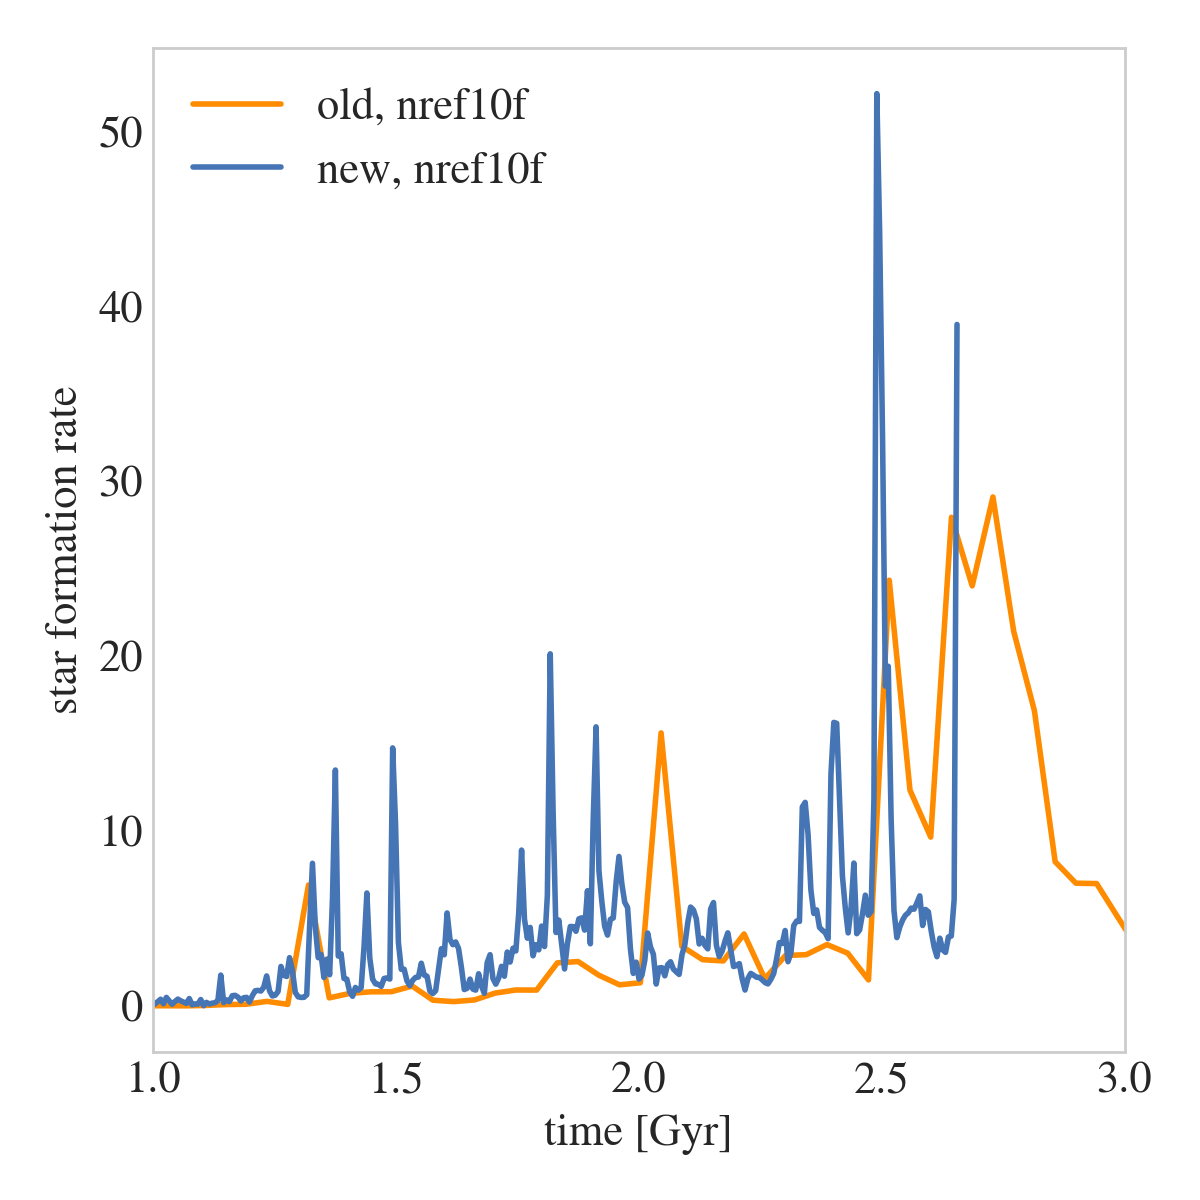

In [77]:
fig = plt.figure(figsize=(6,6))

plt.plot(sfrr.time.to('Gyr'),sfrr.Msol_yr, lw=2, color=ref_color, label="old, nref10f")
#plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_yr, lw=2, color=nat_color, label="old, natural")

plt.plot(sfrnr.time.to('Gyr'),sfrnr.Msol_yr, lw=2, color='#4575b4', label="new, nref10f")
#plt.plot(sfrnn.time.to('Gyr'),sfrnn.Msol_yr, lw=2, color='#4575b4', label="new, natural")

plt.legend(loc='upper left')
plt.xlabel('time [Gyr]')
plt.ylabel('star formation rate')
plt.xlim(1,3)
plt.tight_layout()


<IPython.core.display.Javascript object>


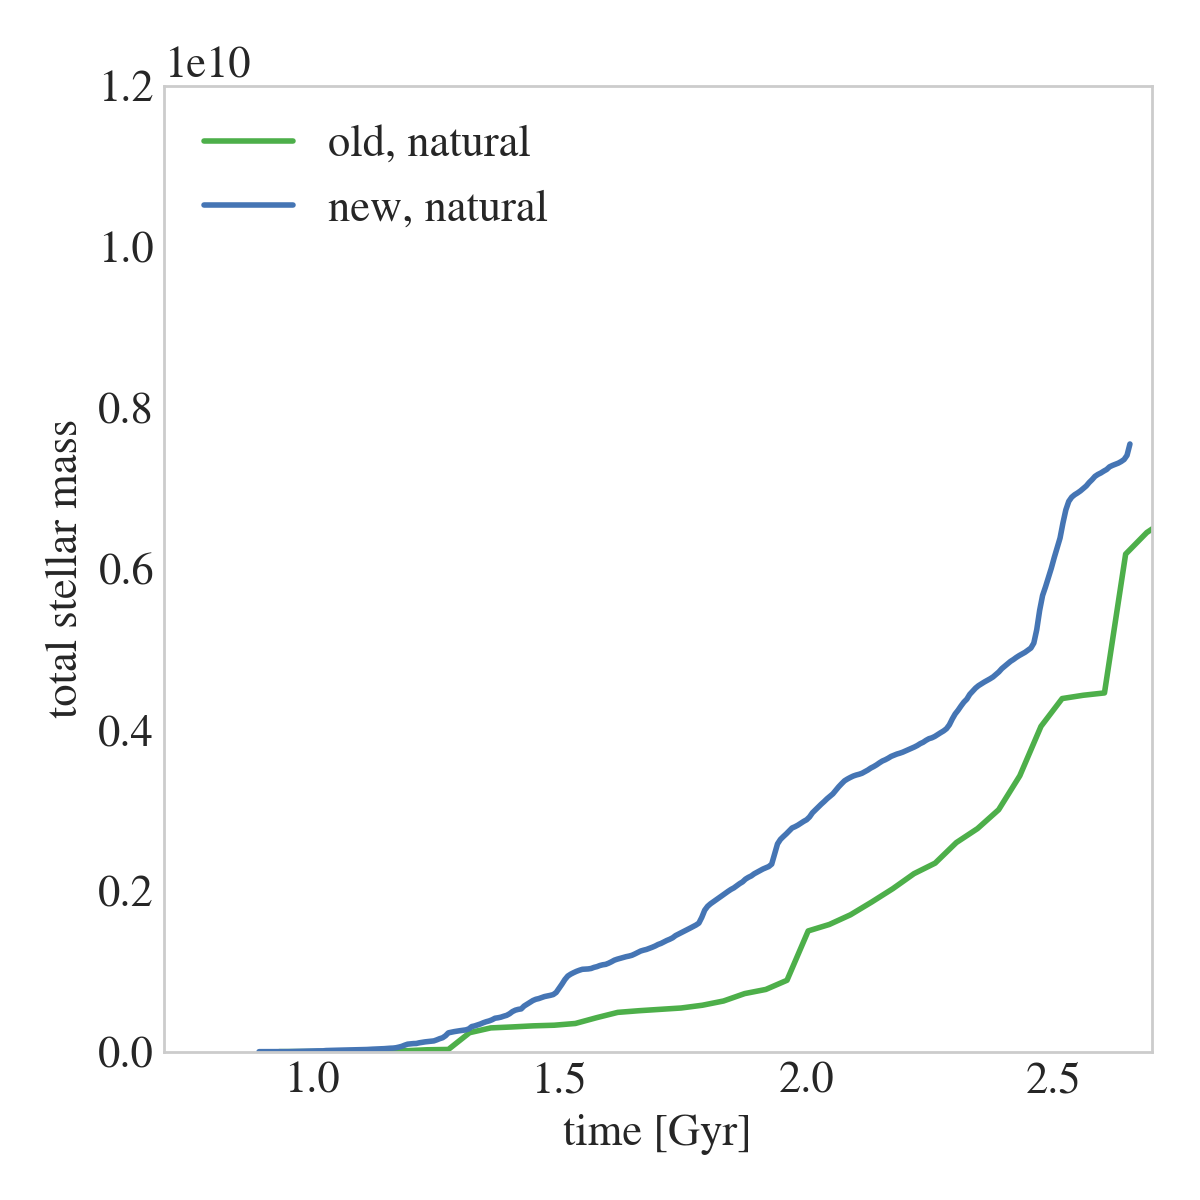

In [94]:
fig = plt.figure(figsize=(6,6))

#plt.plot(sfrr.time.to('Gyr'),sfrr.Msol_cumulative, lw=2, color=ref_color, label="old, nref10f")
plt.plot(sfrn.time.to('Gyr'),sfrn.Msol_cumulative, lw=2, color=nat_color, label="old, natural")

#plt.plot(sfrnr.time.to('Gyr'),sfrnr.Msol_cumulative, lw=2, color='#4575b4', label="new, nref10f")

plt.plot(sfrnn.time.to('Gyr'),sfrnn.Msol_cumulative, lw=2, color='#4575b4', label="new, natural")

plt.legend(loc='upper left')
plt.xlabel('time [Gyr]')
plt.ylabel('total stellar mass')
plt.xlim(0.7,2.7)
plt.ylim(0,1.2e10)
plt.tight_layout()
